# Compare Surface Roughness

## Import Library

In [320]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import cv2
import io
import base64 
import glob
import os
from scipy import signal
import numpy as np
import matplotlib.image as img
from PIL import Image

## Load Image

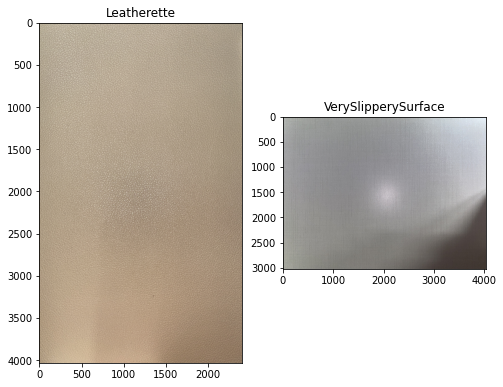

In [321]:
cwd = os.getcwd()
Leatherette_imgPath = cwd+'/DataImage/Leatherette.jpg'
VerySlipperySurface_imgPath = cwd+'/DataImage/VerySlipperySurface.JPG'

Leatherette_Img = img.imread(Leatherette_imgPath)
VerySlipperySurface_Img = img.imread(VerySlipperySurface_imgPath)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.title('Leatherette')
plt.imshow(Leatherette_Img)

plt.subplot(1,2,2)
plt.title('VerySlipperySurface')
plt.imshow(VerySlipperySurface_Img)

plt.show()

## Convert to GrayScale using HSI

In [322]:
def draw_convert_RGB2GRAY(Img):
    
    Gray_Img = np.zeros((Img.shape[0],Img.shape[1]))
    print(Gray_Img.shape)
    Gray_Img = Img[:,:,0]/3 + Img[:,:,1]/3 + Img[:,:,2]/3
    Gray_Img = Gray_Img/255
    
    return Gray_Img
    
    

(4032, 2406)
(3024, 4032)


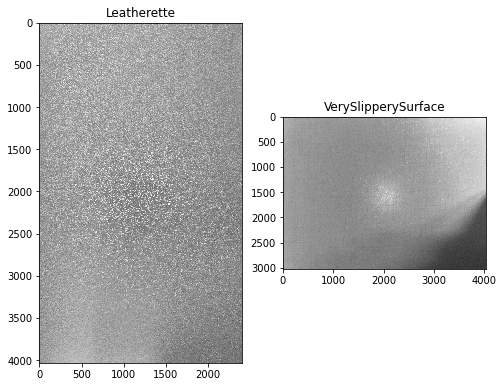

In [323]:
plt.figure(figsize=(8,8))

plt.subplot(1,2,1)
plt.title('Leatherette')
Gray_Leatherette = draw_convert_RGB2GRAY(Leatherette_Img)
plt.imshow(Gray_Leatherette, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(1,2,2)
plt.title('VerySlipperySurface')
Gray_VerySlipperySurface = draw_convert_RGB2GRAY(VerySlipperySurface_Img)
plt.imshow(Gray_VerySlipperySurface, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.show()

## Center of Image's Surface

In [324]:
def draw_surface(title,grayscaledImg, tile_size, set_zlim ,view_Vertical, view_Horizontal):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')

    cutted_width = grayscaledImg.shape[1]//2
    cutted_height = grayscaledImg.shape[0]//2
    center = (cutted_height, cutted_width)
    
    Z = grayscaledImg[center[0]-tile_size:center[0]+tile_size,center[1]-tile_size:center[1]+tile_size]*100

    x = np.linspace(0,Z.shape[1],Z.shape[1])
    y = np.linspace(0,Z.shape[0],Z.shape[0])
    X, Y = np.meshgrid(x,y)


    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    fig.colorbar(surf, shrink=0.6, aspect=15)
    ax.set_zlim(set_zlim)

    # vertical, horizontal
    ax.view_init(view_Vertical, view_Horizontal)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.title(title)
    plt.tight_layout()
    

## Draw Data Image's Surface

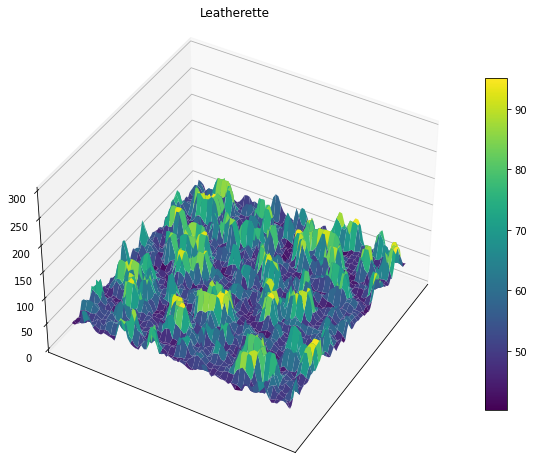

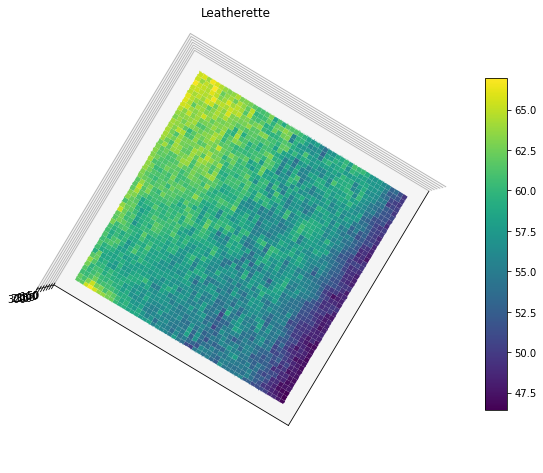

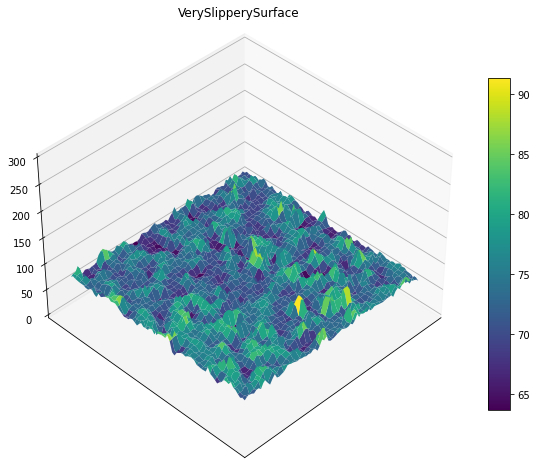

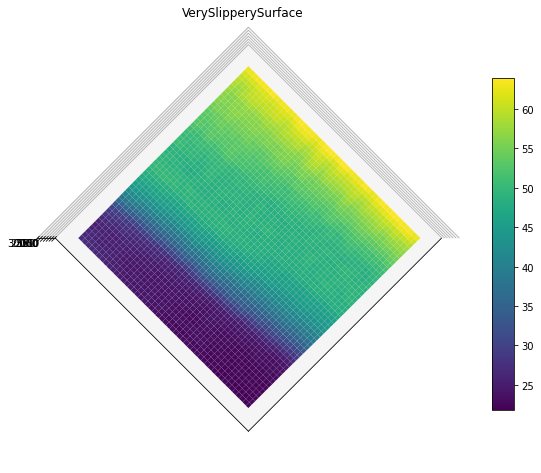

In [325]:
draw_surface('Leatherette',Gray_Leatherette,40,(0,300), 40, 30)
draw_surface('Leatherette',Gray_Leatherette,2000,(0,300), 90, 30)
draw_surface('VerySlipperySurface',Gray_VerySlipperySurface,40,(0,300), 40, 45)
draw_surface('VerySlipperySurface',Gray_VerySlipperySurface,2000,(0,300), 90, 45)


## Extract One Row of Data Image

In [326]:
def extract_one_rowOf_DataImage(title, grayscaledImg):
    plt.figure(figsize=(8,8))
    
    center_row = grayscaledImg.shape[0]//2
    extract_center_row = grayscaledImg[:,center_row]
    
    print('----------------------------------------')
    print(title)
    print('min --> ',min(extract_center_row))
    print('max --> ',max(extract_center_row))
    print('----------------------------------------')
    
    plt.plot(extract_center_row, '-', color='black')
    plt.ylim(0,1)
    plt.title(title)
    plt.show
    
    return extract_center_row

----------------------------------------
Leatherette
min -->  0.36601307189542487
max -->  0.9477124183006534
----------------------------------------


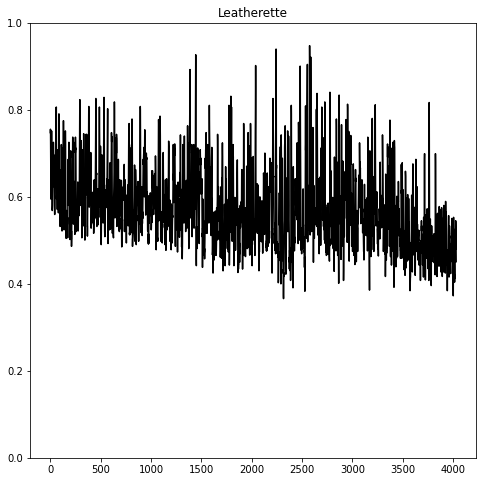

In [327]:
extract_Leatherette = extract_one_rowOf_DataImage('Leatherette',Gray_Leatherette)

----------------------------------------
VerySlipperySurface
min -->  0.4209150326797386
max -->  0.6666666666666666
----------------------------------------


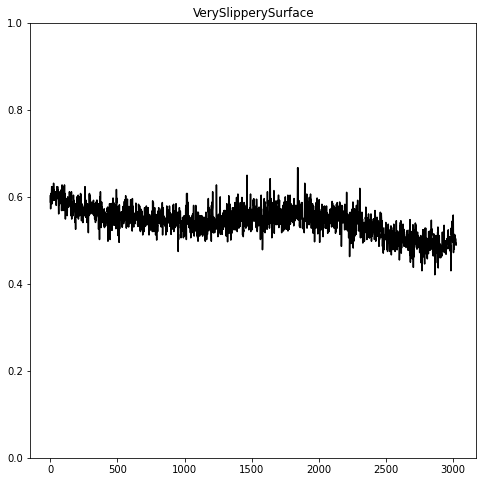

In [328]:
extract_VerySlipperySurface = extract_one_rowOf_DataImage('VerySlipperySurface',Gray_VerySlipperySurface)

## Pass through High & Low Frequency Pass Filter

### Define High & Low Frequency Pass Filter

In [329]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype = "high", analog = False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b,a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

In [330]:
def draw_frequency(title,filtered_frequency):
    plt.figure(figsize=(8,8))
    
    print('----------------------------------------')
    print(title)
    print('min --> ',min(filtered_frequency))
    print('max --> ',max(filtered_frequency))
    print('----------------------------------------')
    
    plt.plot(filtered_frequency, '-', color='black')

    plt.title(title)
    plt.show

----------------------------------------
Leatherette
min -->  0.36601307189542487
max -->  0.9477124183006534
----------------------------------------


array([0.74771242, 0.75555556, 0.74379085, ..., 0.49019608, 0.46666667,
       0.45098039])

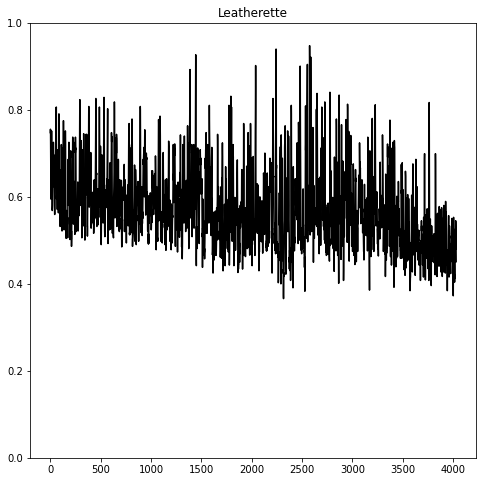

In [331]:
extract_one_rowOf_DataImage('Leatherette',Gray_Leatherette)

----------------------------------------
HPF_Leatherette
min -->  -0.146994827885098
max -->  0.156733391094746
----------------------------------------
----------------------------------------
LPF_Leatherette
min -->  0.39254391515822085
max -->  0.8350709949867249
----------------------------------------


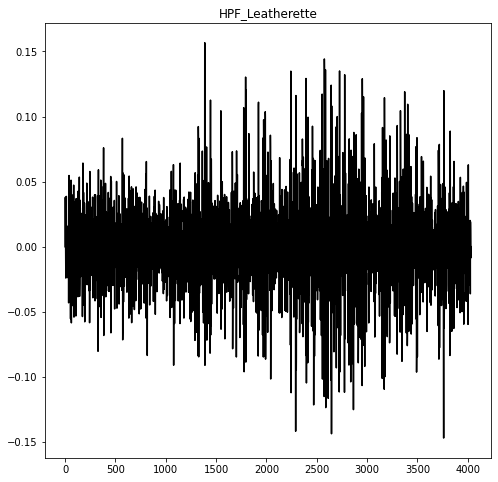

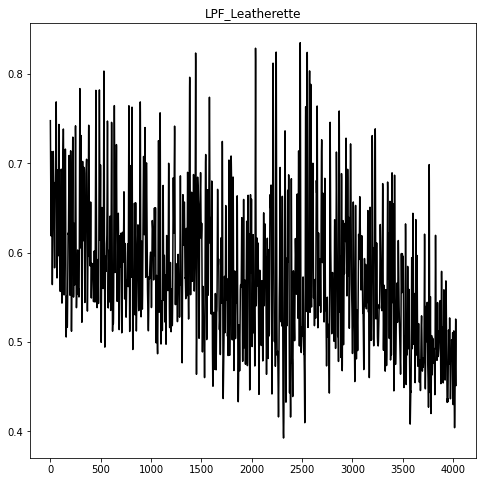

In [332]:
HPF_Leatherette = butter_highpass_filter(extract_Leatherette,10,100)
draw_frequency('HPF_Leatherette',filtered_frequency=HPF_Leatherette)
LPF_Leatherette = butter_lowpass_filter(extract_Leatherette,10,100)
draw_frequency('LPF_Leatherette',filtered_frequency=LPF_Leatherette)


----------------------------------------
VerySlipperySurface
min -->  0.4209150326797386
max -->  0.6666666666666666
----------------------------------------


array([0.58823529, 0.60392157, 0.57254902, ..., 0.49281046, 0.48888889,
       0.49281046])

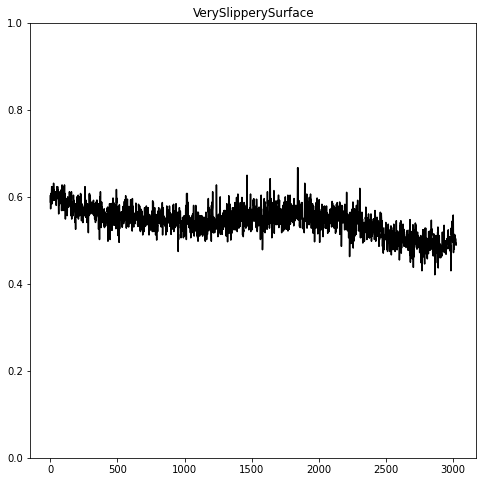

In [333]:
extract_one_rowOf_DataImage('VerySlipperySurface',Gray_VerySlipperySurface)

----------------------------------------
HPF_VerySlipperySurface
min -->  -0.06334486253389865
max -->  0.06205095510188361
----------------------------------------
----------------------------------------
LPF_VerySlipperySurface
min -->  0.4562764377928066
max -->  0.6348093780466495
----------------------------------------


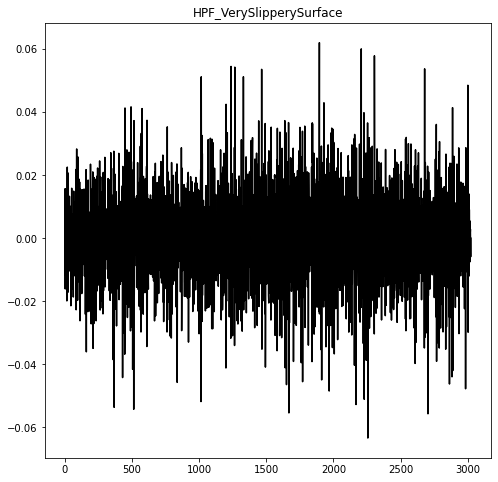

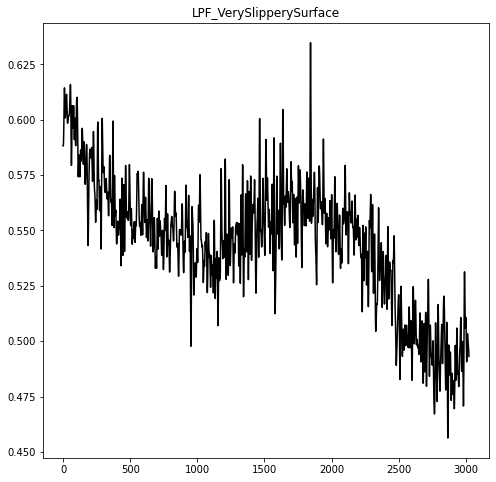

In [334]:
HPF_VerySlipperySurface = butter_highpass_filter(extract_VerySlipperySurface,10,100)
draw_frequency('HPF_VerySlipperySurface',filtered_frequency=HPF_VerySlipperySurface)
LPF_VerySlipperySurface = butter_lowpass_filter(extract_VerySlipperySurface,10,100)
draw_frequency('LPF_VerySlipperySurface',filtered_frequency=LPF_VerySlipperySurface)


## Evaluate Surface Roughness

### Ra : Arithmetical Average Roughness

In [335]:
def compute_Ra(r_profile):
    
    abs_rProfile = np.absolute(r_profile)
    sum_rProfile = np.sum(abs_rProfile)
    
    return sum_rProfile / len(r_profile)

In [358]:
print('HPF_Leatherette --> ',compute_Ra(HPF_Leatherette))
print('HPF_VerySlipperySurface --> ',compute_Ra(HPF_VerySlipperySurface))

HPF_Leatherette -->  0.024019241950327074
HPF_VerySlipperySurface -->  0.011124422694403677


### Rz1max : Maximum Height Roughness

In [337]:
def compute_Rz1max(r_profile):
    
    abs_rProfile = np.absolute(r_profile)
    min_profile = min(abs_rProfile)
    max_profile = max(abs_rProfile)
    
    return min_profile + max_profile

In [359]:
print('HPF_Leatherette --> ',compute_Rz1max(HPF_Leatherette))
print('HPF_VerySlipperySurface --> ',compute_Rz1max(HPF_VerySlipperySurface))

HPF_Leatherette -->  0.15673506697751402
HPF_VerySlipperySurface -->  0.06334817912892884


### Rz : Ten Point Heignt

In [339]:
def compute_Rz(r_profile):
    
    sorted_array = np.sort(r_profile, axis=None)
    bottom_5 = np.absolute(sorted_array[:5])
    bottom_5 = np.sum(bottom_5)
    top_5 = sorted_array[-5:]
    top_5 = np.sum(top_5)
    Rz = (bottom_5 + top_5) / 5
    
    return Rz

In [360]:
print('HPF_Leatherette --> ',compute_Rz(HPF_Leatherette))
print('HPF_VerySlipperySurface --> ',compute_Rz(HPF_VerySlipperySurface))

HPF_Leatherette -->  0.2778734101757831
HPF_VerySlipperySurface -->  0.11421142019315525


---

---

# Analyze Crushed Brick Surface Image

## Load Image

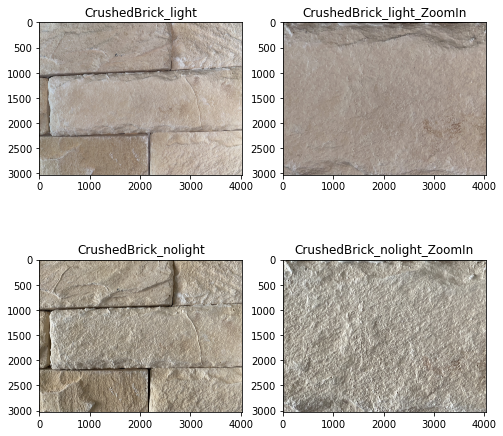

In [341]:
cwd = os.getcwd()
CrushedBrick_light_Path = cwd+'/DataImage/CrushedBrick_light.JPG'
CrushedBrick_light_ZoomIn_Path = cwd+'/DataImage/CrushedBrick_light_ZoomIn.JPG'
CrushedBrick_nolight_Path = cwd+'/DataImage/CrushedBrick_nolight.JPG'
CrushedBrick_nolight_ZoomIn_Path = cwd+'/DataImage/CrushedBrick_nolight_ZoomIn.JPG'

CrushedBrick_light_Img = img.imread(CrushedBrick_light_Path)
CrushedBrick_light_ZoomIn_Img = img.imread(CrushedBrick_light_ZoomIn_Path)
CrushedBrick_nolight_Img = img.imread(CrushedBrick_nolight_Path)
CrushedBrick_nolight_ZoomIn_Img = img.imread(CrushedBrick_nolight_ZoomIn_Path)

plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.title('CrushedBrick_light')
plt.imshow(CrushedBrick_light_Img)

plt.subplot(2,2,2)
plt.title('CrushedBrick_light_ZoomIn')
plt.imshow(CrushedBrick_light_ZoomIn_Img)

plt.subplot(2,2,3)
plt.title('CrushedBrick_nolight')
plt.imshow(CrushedBrick_nolight_Img)

plt.subplot(2,2,4)
plt.title('CrushedBrick_nolight_ZoomIn')
plt.imshow(CrushedBrick_nolight_ZoomIn_Img)

plt.show()

## Convert to GrayScale using HSI

(3024, 4032)
(3024, 4032)
(3024, 4032)
(3024, 4032)


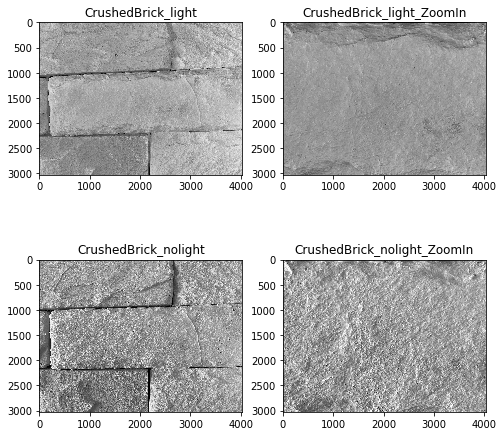

In [342]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
plt.title('CrushedBrick_light')
Gray_CrushedBrick_light = draw_convert_RGB2GRAY(CrushedBrick_light_Img)
plt.imshow(Gray_CrushedBrick_light, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(2,2,2)
plt.title('CrushedBrick_light_ZoomIn')
Gray_CrushedBrick_light_ZoomIn = draw_convert_RGB2GRAY(CrushedBrick_light_ZoomIn_Img)
plt.imshow(Gray_CrushedBrick_light_ZoomIn, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(2,2,3)
plt.title('CrushedBrick_nolight')
Gray_CrushedBrick_nolight = draw_convert_RGB2GRAY(CrushedBrick_nolight_Img)
plt.imshow(Gray_CrushedBrick_nolight, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.subplot(2,2,4)
plt.title('CrushedBrick_nolight_ZoomIn')
Gray_CrushedBrick_nolight_ZoomIn = draw_convert_RGB2GRAY(CrushedBrick_nolight_ZoomIn_Img)
plt.imshow(Gray_CrushedBrick_nolight_ZoomIn, cmap='gray', vmin=0, vmax=1, interpolation='none')

plt.show()

## Draw Center of Image's Surface

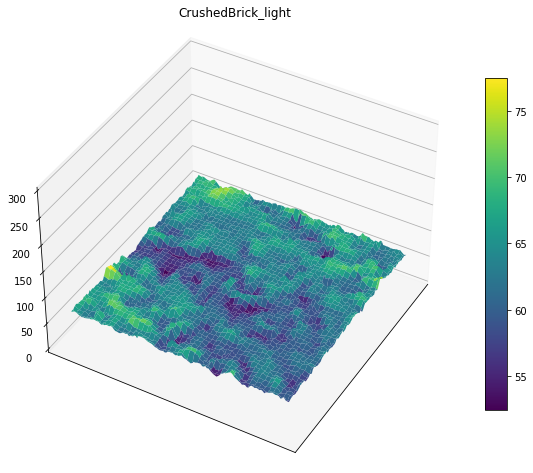

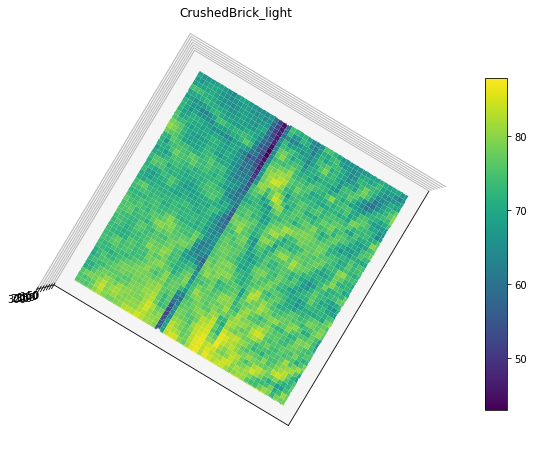

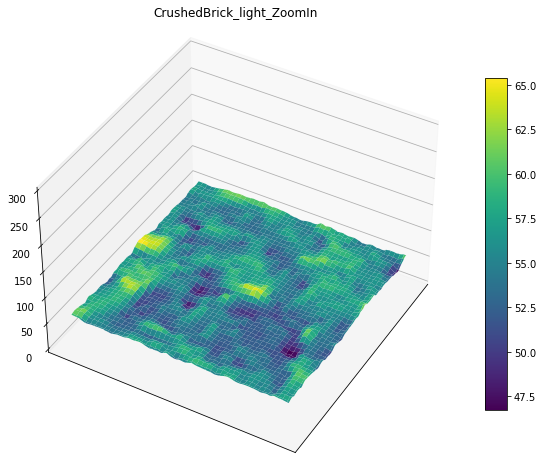

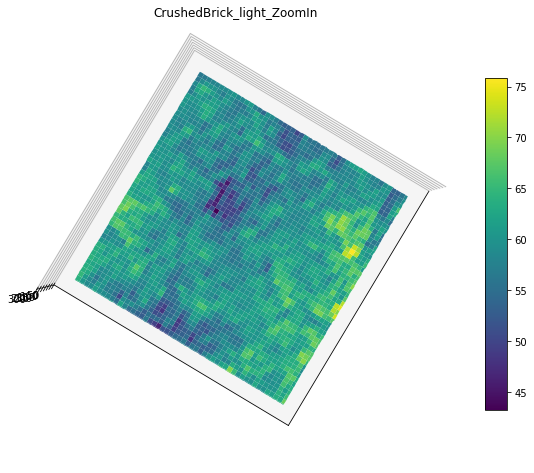

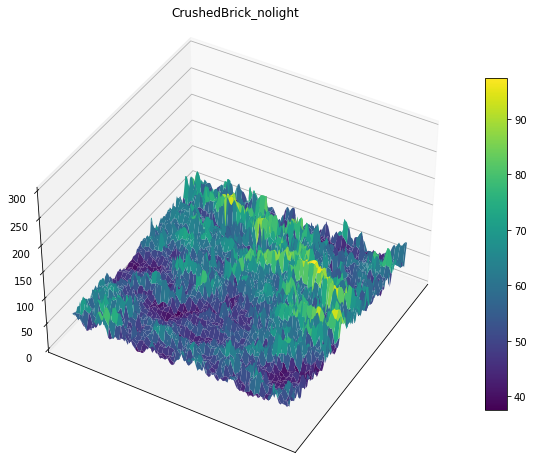

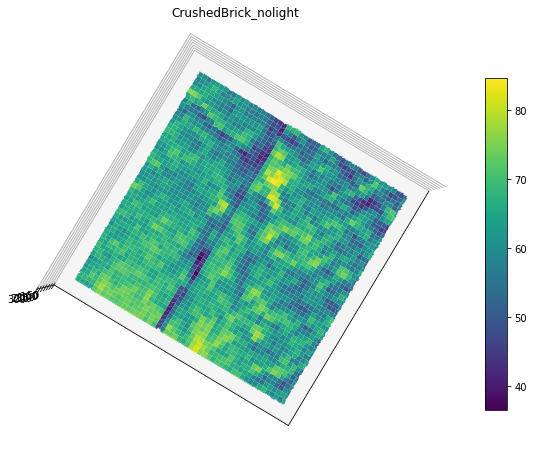

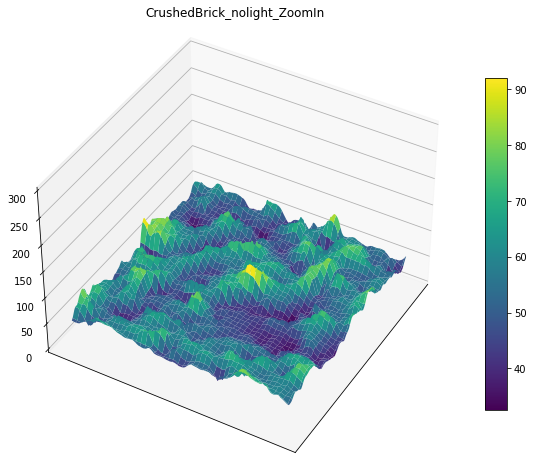

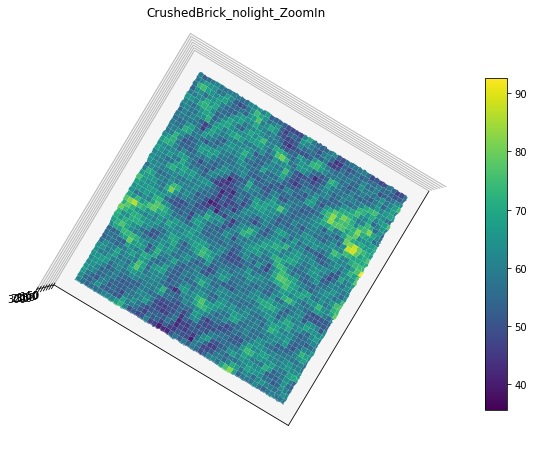

In [343]:
draw_surface('CrushedBrick_light',Gray_CrushedBrick_light,70,(0,300),40,30)
draw_surface('CrushedBrick_light',Gray_CrushedBrick_light,3000,(0,300),90,30)

draw_surface('CrushedBrick_light_ZoomIn',Gray_CrushedBrick_light_ZoomIn,70,(0,300),40,30)
draw_surface('CrushedBrick_light_ZoomIn',Gray_CrushedBrick_light_ZoomIn,3000,(0,300),90,30)

draw_surface('CrushedBrick_nolight',Gray_CrushedBrick_nolight,70,(0,300),40,30)
draw_surface('CrushedBrick_nolight',Gray_CrushedBrick_nolight,3000,(0,300),90,30)

draw_surface('CrushedBrick_nolight_ZoomIn',Gray_CrushedBrick_nolight_ZoomIn,70,(0,300),40,30)
draw_surface('CrushedBrick_nolight_ZoomIn',Gray_CrushedBrick_nolight_ZoomIn,3000,(0,300),90,30)

## Extract One Row of Data Image

----------------------------------------
CrushedBrick_light
min -->  0.0326797385620915
max -->  0.8104575163398693
----------------------------------------


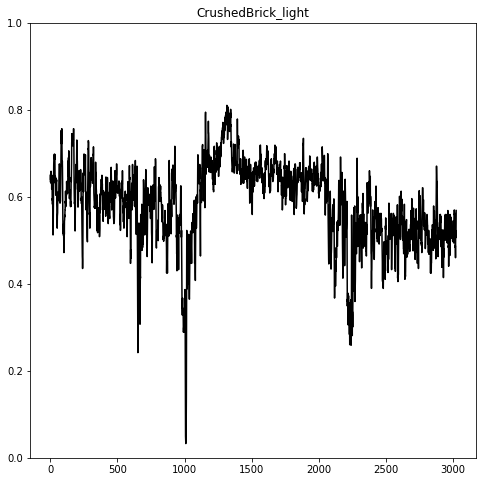

In [344]:
extract_CrushedBrick_light = extract_one_rowOf_DataImage('CrushedBrick_light',Gray_CrushedBrick_light)

----------------------------------------
CrushedBrick_light_ZoomIn
min -->  0.013071895424836602
max -->  0.722875816993464
----------------------------------------


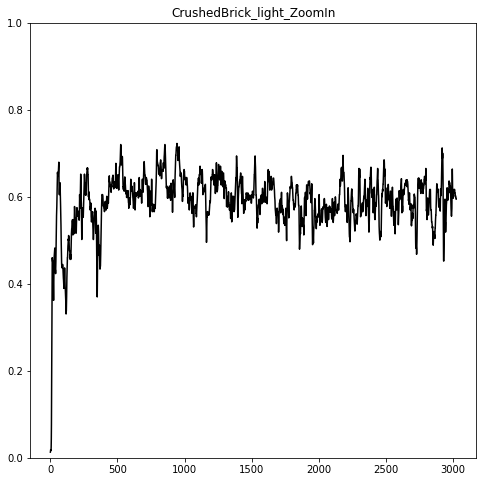

In [345]:
extract_CrushedBrick_light_ZoomIn = extract_one_rowOf_DataImage('CrushedBrick_light_ZoomIn',Gray_CrushedBrick_light_ZoomIn)

----------------------------------------
CrushedBrick_nolight
min -->  0.044444444444444446
max -->  0.9816993464052287
----------------------------------------


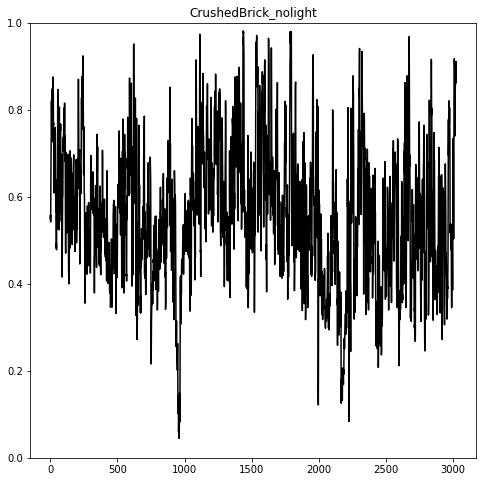

In [346]:
extract_CrushedBrick_nolight = extract_one_rowOf_DataImage('CrushedBrick_nolight',Gray_CrushedBrick_nolight)

----------------------------------------
CrushedBrick_nolight_ZoomIn
min -->  0.01045751633986928
max -->  0.9934640522875816
----------------------------------------


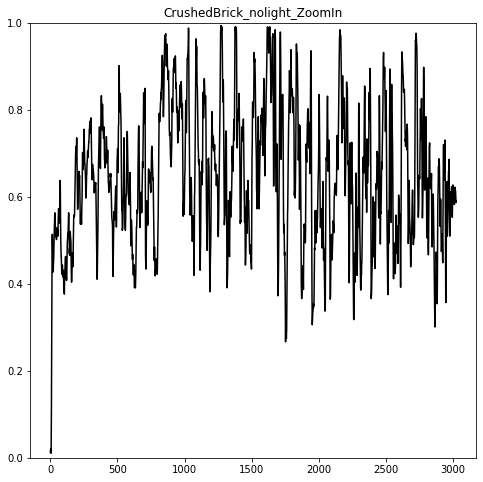

In [347]:
extract_CrushedBrick_nolight_ZoomIn = extract_one_rowOf_DataImage('CrushedBrick_nolight_ZoomIn',Gray_CrushedBrick_nolight_ZoomIn)

## Pass through High & Low Frequency Pass Filter

----------------------------------------
CrushedBrick_light
min -->  0.0326797385620915
max -->  0.8104575163398693
----------------------------------------
----------------------------------------
HPF_CrushedBrick_light
min -->  -0.10304779996271721
max -->  0.14404649905202266
----------------------------------------
----------------------------------------
LPF_CrushedBrick_light
min -->  0.021686754174102957
max -->  0.7884952615683232
----------------------------------------


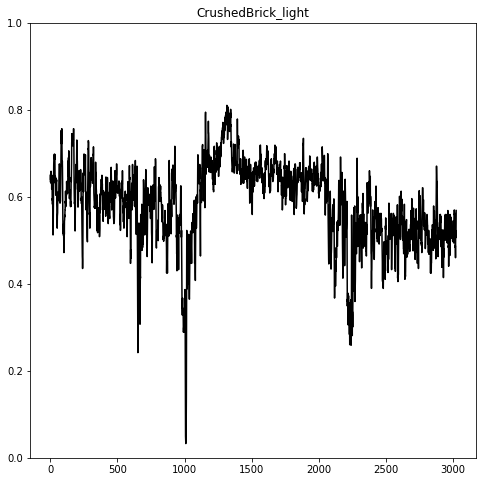

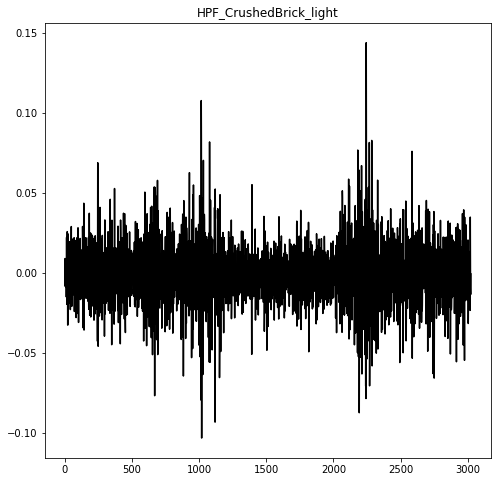

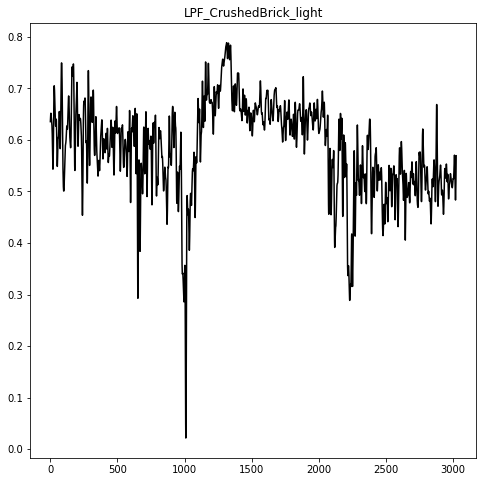

In [352]:
extract_one_rowOf_DataImage('CrushedBrick_light',Gray_CrushedBrick_light)
HPF_CrushedBrick_light = butter_highpass_filter(extract_CrushedBrick_light,10,100)
draw_frequency('HPF_CrushedBrick_light',filtered_frequency=HPF_CrushedBrick_light)
LPF_CrushedBrick_light = butter_lowpass_filter(extract_CrushedBrick_light,10,100)
draw_frequency('LPF_CrushedBrick_light',filtered_frequency=LPF_CrushedBrick_light)

----------------------------------------
CrushedBrick_light_ZoomIn
min -->  0.013071895424836602
max -->  0.722875816993464
----------------------------------------
----------------------------------------
HPF_CrushedBrick_light_ZoomIn
min -->  -0.03106684226589685
max -->  0.03276722954645715
----------------------------------------
----------------------------------------
LPF_CrushedBrick_light_ZoomIn
min -->  0.005718126030998607
max -->  0.719620271140255
----------------------------------------


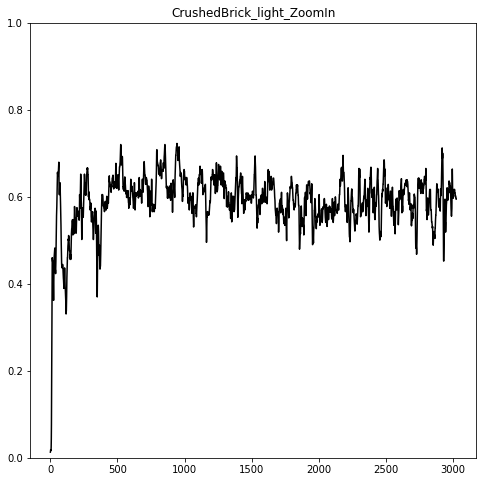

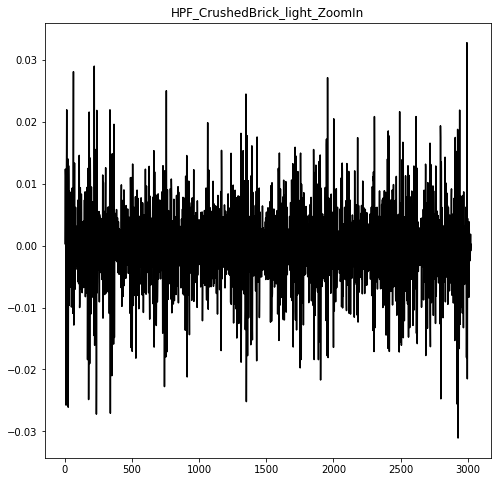

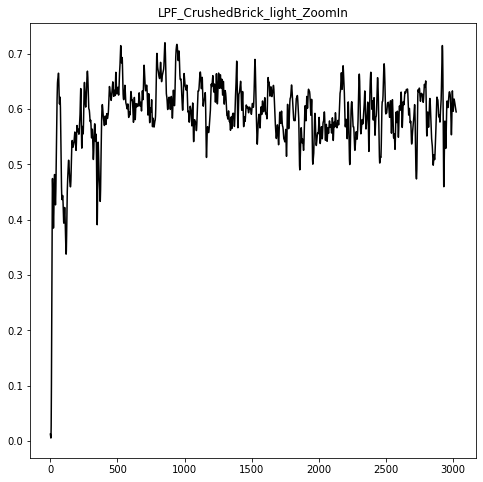

In [353]:
extract_one_rowOf_DataImage('CrushedBrick_light_ZoomIn',Gray_CrushedBrick_light_ZoomIn)
HPF_CrushedBrick_light_ZoomIn = butter_highpass_filter(extract_CrushedBrick_light_ZoomIn,10,100)
draw_frequency('HPF_CrushedBrick_light_ZoomIn',filtered_frequency=HPF_CrushedBrick_light_ZoomIn)
LPF_CrushedBrick_light_ZoomIn = butter_lowpass_filter(extract_CrushedBrick_light_ZoomIn,10,100)
draw_frequency('LPF_CrushedBrick_light_ZoomIn',filtered_frequency=LPF_CrushedBrick_light_ZoomIn)

----------------------------------------
CrushedBrick_nolight
min -->  0.044444444444444446
max -->  0.9816993464052287
----------------------------------------
----------------------------------------
HPF_CrushedBrick_nolight
min -->  -0.2294648255713689
max -->  0.34873675314693486
----------------------------------------
----------------------------------------
LPF_CrushedBrick_nolight
min -->  0.057094831626756014
max -->  1.0112495120012728
----------------------------------------


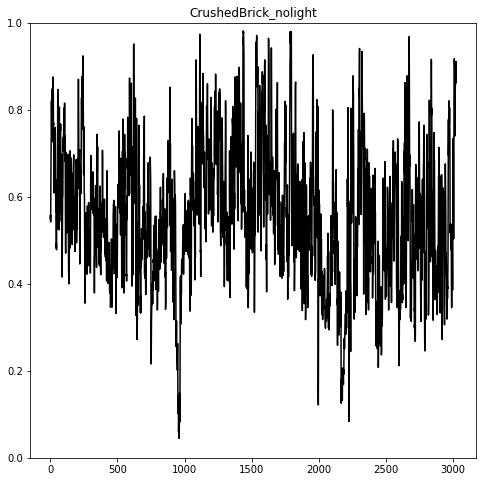

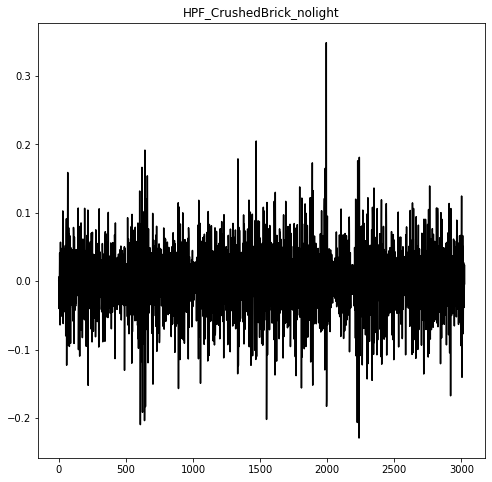

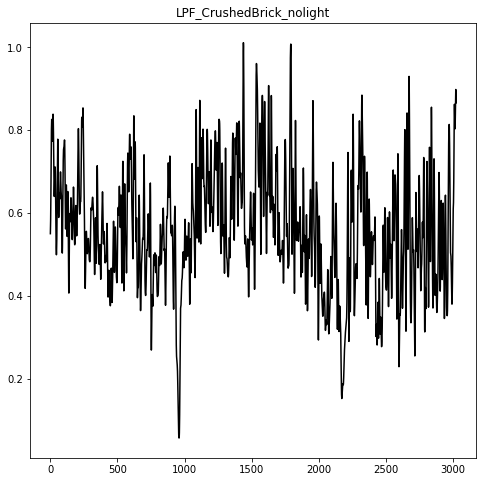

In [356]:
extract_one_rowOf_DataImage('CrushedBrick_nolight',Gray_CrushedBrick_nolight)
HPF_CrushedBrick_nolight = butter_highpass_filter(extract_CrushedBrick_nolight,10,100)
draw_frequency('HPF_CrushedBrick_nolight',filtered_frequency=HPF_CrushedBrick_nolight)
LPF_CrushedBrick_nolight = butter_lowpass_filter(extract_CrushedBrick_nolight,10,100)
draw_frequency('LPF_CrushedBrick_nolight',filtered_frequency=LPF_CrushedBrick_nolight)

----------------------------------------
CrushedBrick_nolight_ZoomIn
min -->  0.01045751633986928
max -->  0.9934640522875816
----------------------------------------
----------------------------------------
HPF_CrushedBrick_nolight_ZoomIn
min -->  -0.083762467105782
max -->  0.07566260762403797
----------------------------------------
----------------------------------------
LPF_CrushedBrick_nolight_ZoomIn
min -->  0.000129534001232202
max -->  0.9965819817348879
----------------------------------------


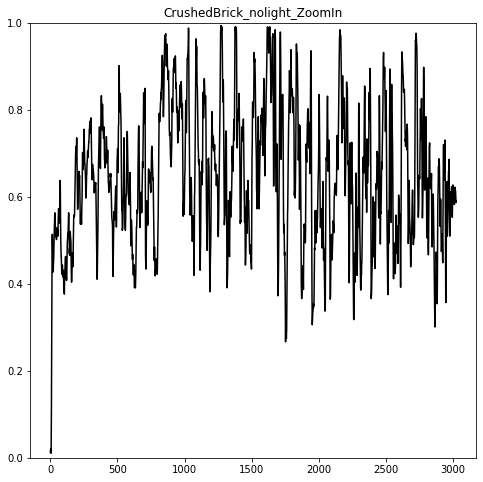

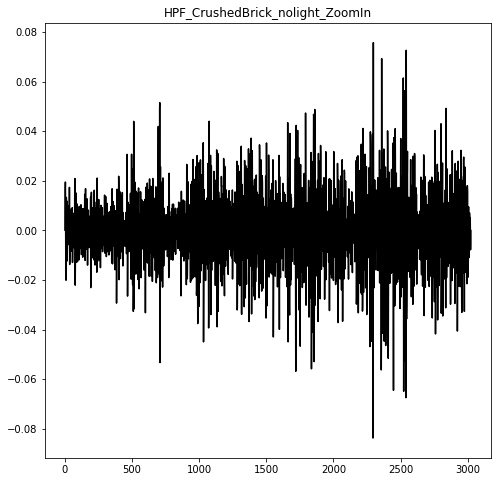

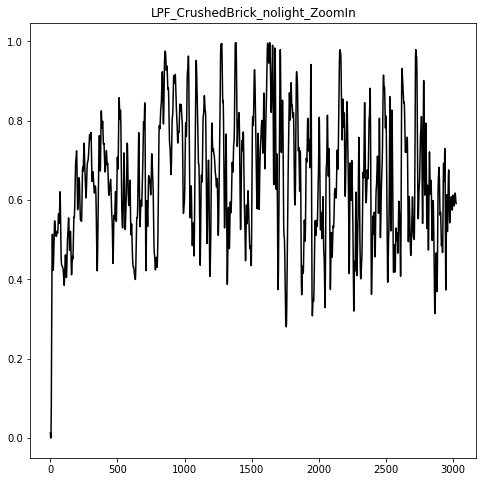

In [355]:
extract_one_rowOf_DataImage('CrushedBrick_nolight_ZoomIn',Gray_CrushedBrick_nolight_ZoomIn)
HPF_CrushedBrick_nolight_ZoomIn = butter_highpass_filter(extract_CrushedBrick_nolight_ZoomIn,10,100)
draw_frequency('HPF_CrushedBrick_nolight_ZoomIn',filtered_frequency=HPF_CrushedBrick_nolight_ZoomIn)
LPF_CrushedBrick_nolight_ZoomIn = butter_lowpass_filter(extract_CrushedBrick_nolight_ZoomIn,10,100)
draw_frequency('LPF_CrushedBrick_nolight_ZoomIn',filtered_frequency=LPF_CrushedBrick_nolight_ZoomIn)

## Evaluate All Crushed Brick Images

## Evaluate with Ra

In [357]:
print('CrushedBrick_light --> ',compute_Ra(HPF_CrushedBrick_light))
print('CrushedBrick_light_ZoomIn --> ',compute_Ra(HPF_CrushedBrick_light_ZoomIn))
print('CrushedBrick_nolight --> ',compute_Ra(HPF_CrushedBrick_nolight))
print('CrushedBrick_nolight_ZoomIn --> ',compute_Ra(HPF_CrushedBrick_nolight_ZoomIn))

CrushedBrick_light -->  0.013864351198789393
CrushedBrick_light_ZoomIn -->  0.005054702865621716
CrushedBrick_nolight -->  0.03833757618154245
CrushedBrick_nolight_ZoomIn -->  0.01132962778675824


## Evaluate with Rz1max

In [361]:
print('CrushedBrick_light --> ',compute_Rz1max(HPF_CrushedBrick_light))
print('CrushedBrick_light_ZoomIn --> ',compute_Rz1max(HPF_CrushedBrick_light_ZoomIn))
print('CrushedBrick_nolight --> ',compute_Rz1max(HPF_CrushedBrick_nolight))
print('CrushedBrick_nolight_ZoomIn --> ',compute_Rz1max(HPF_CrushedBrick_nolight_ZoomIn))

CrushedBrick_light -->  0.14404891690839272
CrushedBrick_light_ZoomIn -->  0.032768460903043174
CrushedBrick_nolight -->  0.3487601789649371
CrushedBrick_nolight_ZoomIn -->  0.08376358419098788


## Evaluate with Rz

In [362]:
print('CrushedBrick_light --> ',compute_Rz(HPF_CrushedBrick_light))
print('CrushedBrick_light_ZoomIn --> ',compute_Rz(HPF_CrushedBrick_light_ZoomIn))
print('CrushedBrick_nolight --> ',compute_Rz(HPF_CrushedBrick_nolight))
print('CrushedBrick_nolight_ZoomIn --> ',compute_Rz(HPF_CrushedBrick_nolight_ZoomIn))

CrushedBrick_light -->  0.18983843705952297
CrushedBrick_light_ZoomIn -->  0.05582767919217714
CrushedBrick_nolight -->  0.4314532802056677
CrushedBrick_nolight_ZoomIn -->  0.1345596007472849
